README

UWN 2010-10
Gerard de Melo
http://www.mpi-inf.mpg.de/yago-naga/uwn/


== DESCRIPTION ==

UWN is an automatically constructed multilingual lexical knowledge base
based on the structure of Princeton WordNet. Please see the web site above
for more information.

UWN is best used in conjunction with the original WordNet created at
at Princeton University. 
http://wordnet.princeton.edu


== DATA FORMAT ==

The gzip-compressed TSV file is best decompressed on the fly
while reading for best performance. Each line contains subject, predicate,
object, and weight, separated by tabs.
Words and other terms are listed as "t/<iso-639-3-language-code>/<string>", e.g.
"t/eng/house" for the English term "house".
Predicates include "rel:means" for the relationship between a term and its meanings.
WordNet senses are given as "s/<wordnet-pos-tag><wordnet-3.0-synset-offset>"
(e.g. "s/n1740" for WordNet 3.0's entity synset).


== CREDITS AND LICENSE ==

Gerard de Melo
http://icsi.berkeley.edy/~demelo/

For academic use, please cite:
Gerard de Melo and Gerhard Weikum (2009). Towards a Universal Wordnet by Learning from Combined Evidence.
In: Proc. 18th ACM Conference on Information and Knowledge Management (CIKM 2009),
Hong Kong, China. ACM, New York, USA.

License: CC BY-NC-SA 3.0
http://creativecommons.org/licenses/by-nc-sa/3.0/

In [41]:
import pandas as pd

df = pd.read_csv('../wordnet/data/uwn-dump_201012.tsv', delimiter='\t', header=None, names=['subject', 'predicate', 'object', 'weight'])

In [42]:
df.head()

,subject,predicate,object,weight
0,t/xmf/ბულგარულ,rel:means,language/bul,1.187343
1,t/xmf/ბულგარულ,rel:means,s/n9695620,1.224455
2,t/xmf/ინგლისურ,rel:means,s/n6155432,0.938639
3,t/xmf/ინგლისურ,rel:means,s/n6947032,1.220780
4,t/xmf/ფრანგულ,rel:means,language/fra,1.337511


In [43]:
terms = df[df.subject.str.startswith('t/')]

In [44]:
synsets = df[df.subject.str.startswith('s/')]

In [45]:
terms.predicate.value_counts()

rel:means    1848113
Name: predicate, dtype: int64

In [46]:
synsets.predicate.value_counts()

rel:lexicalization    1810685
Name: predicate, dtype: int64

Not sure what weight means... 

In [47]:
synsets.head(20)

,subject,predicate,object,weight
13,s/n9002814,rel:lexicalization,t/tha/รัสเซีย,0.703229
14,s/n9002814,rel:lexicalization,t/tur/Rusya Federasyonu,0.730033
15,s/n9002814,rel:lexicalization,t/arb/روسيا,0.763194
16,s/n9002814,rel:lexicalization,t/ara/روسيا,0.707933
17,s/n9002814,rel:lexicalization,t/vol/Rusän,0.763194
18,s/n9002814,rel:lexicalization,t/lfn/Rusia,0.763194
19,s/n9002814,rel:lexicalization,t/ind/Rusia,0.733253
20,s/n9002814,rel:lexicalization,t/pes/روسیه,0.763194
21,s/n9002814,rel:lexicalization,t/hun/Oroszország,0.735622
22,s/n9002814,rel:lexicalization,t/lit/Rusijos Federacija,0.730033


In [48]:
def extract_language(x):
    split = x.split('/')
    lan = split[1]
    return lan

def extract_term(x):
    split = x.split('/')
    term = split[2]
    return term

def extract_synset(x):
    split = x.split('/')
    synset = split[1][1:]
    return synset

def extract_pos(x):
    split = x.split('/')
    pos = split[1][0]
    return pos

In [49]:
terms = terms[terms.object.str.startswith('s/')]
terms.loc[:, 'term'] = terms.subject.apply(extract_term)
terms.loc[:, 'lan'] = terms.subject.apply(extract_language)
terms.loc[:, 'synset'] = terms.object.apply(extract_synset)
terms.loc[:, 'pos'] = terms.object.apply(extract_pos)

In [50]:
uwn_terms = terms.drop(['subject', 'predicate', 'object'], axis=1)

In [51]:
import os

columns = ['synset', 'type', 'term']
wns = pd.DataFrame(columns=columns)

for lan in os.listdir('../wordnet/data/wns/'):
    filename = f'../wordnet/data/wns/{lan}/wn-data-{lan}.tab'
    if os.path.isfile(filename):
        df = pd.read_csv(filename, delimiter='\t', names=columns, index_col=False, skiprows=1)
        wns = pd.concat([wns, df],axis=0, ignore_index=True)

/Users/manu/deep_learning_nlp/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [52]:
wns.head()

,synset,type,term
0,00001740-a,lemma,able
1,00002098-a,lemma,unable
2,00002312-a,lemma,abaxial
3,00002312-a,lemma,dorsal
4,00002527-a,lemma,adaxial


In [53]:
def extract_language_2(x):
    split = x.split(':')
    lan = split[0]
    return lan

def extract_type(x):
    split = x.split(':')
    _type = split[1]
    return _type

In [54]:
wns['type'] = wns['type'].replace('lemma', 'fin:lemma')

wns['lan'] = wns.type.apply(extract_language_2)
wns['type'] = wns.type.apply(extract_type)
wns['pos'] = wns['synset'].apply(lambda x: x[-1])
wns['synset'] = wns['synset'].apply(lambda x: x[1:-2])

In [55]:
import seaborn as sns

<AxesSubplot:ylabel='type'>

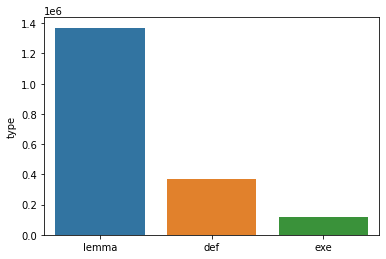

In [56]:
sns.barplot(x=wns.type.value_counts().index, y=wns.type.value_counts())

In [57]:
wns.lan.value_counts()

fin    567164
jpn    342037
eng    183968
ron    143393
fra    102671
slv     69405
ita     67441
nld     60259
arb     54975
pol     52380
hrv     47900
slk     44029
ell     42251
bul     28382
als     17626
isl     15462
heb     13481
swe      6989
Name: lan, dtype: int64

In [58]:
wns[wns.type == 'exe'].term

723142     0
723145     0
723166     0
723167     1
723168     2
          ..
1859801    1
1859802    2
1859810    0
1859811    1
1859812    2
Name: term, Length: 119773, dtype: object

In [59]:
from nltk.corpus import wordnet as wn

In [60]:
wn.synsets('Russia')

[Synset('soviet_union.n.01'),
 Synset('soviet_russia.n.01'),
 Synset('russia.n.03'),
 Synset('russia.n.04')]

In [61]:
wns[wns.term == 'Russia'].head()

,synset,type,term,lan,pos
143377,9002814,lemma,Russia,fin,n
143379,9003284,lemma,Russia,fin,n
143399,9006413,lemma,Russia,fin,n
143404,9007723,lemma,Russia,fin,n
797897,9003284,lemma,Russia,ita,n


In [62]:
uwn_terms.lan.value_counts()

deu    110591
cmn    104763
fra     72022
eng     69454
kor     69084
        ...  
sma         1
mam         1
ars         1
ndo         1
swb         1
Name: lan, Length: 417, dtype: int64

In [63]:
wns_lemma = wns[wns.type == 'lemma'].drop(['type'], axis=1)
uwn_terms = uwn_terms.drop(['weight'], axis=1)

In [67]:
def get_wn_synset(synset, pos):
    return wn.of2ss(f'0{synset}-{pos}')

In [68]:
get_wn_synset(wns_lemma.synset.iloc[0], wns_lemma.pos.iloc[0])

Synset('able.a.01')

In [69]:
get_wn_synset(uwn_terms.synset.iloc[0], uwn_terms.pos.iloc[0])

Synset('bulgarian.n.01')

In [29]:
tot = pd.concat([uwn_terms, wns_lemma], axis=0)

In [30]:
tot.shape

(3181180, 4)

In [31]:
tot.term.duplicated().sum()

1352936

In [32]:
tot.head()

,term,lan,synset,pos
1,ბულგარულ,xmf,9695620,n
2,ინგლისურ,xmf,6155432,n
3,ინგლისურ,xmf,6947032,n
5,ფრანგულ,xmf,9708405,n
7,ესპანურ,xmf,9731906,n


In [33]:
tot.lan.value_counts()

fin    612176
jpn    179885
fra    174693
ita    123133
deu    110591
        ...  
lub         1
aka         1
sid         1
ban         1
tay         1
Name: lan, Length: 417, dtype: int64

In [34]:
tot.term.value_counts()

GAP!                    1298
biti                     724
imeti                    167
faire                    160
face                     160
                        ... 
nacela                     1
zàmišljeno                 1
psychomotor epilepsy       1
uvodna riječ               1
                           1
Name: term, Length: 1828243, dtype: int64

In [35]:
tot.pos.value_counts()

n    2111276
a     486104
v     477034
r     102754
s       4012
Name: pos, dtype: int64

In [40]:
wns[wns.type == 'def'].lan.value_counts()

jpn    135692
eng    135692
ron     58754
ell     18136
heb      6609
bul      4969
als      4686
slv      2838
ita      2169
Name: lan, dtype: int64

In [120]:
ita_wns = wns[(wns.lan == 'ita') & (wns.type == 'lemma')].drop('type', axis=1)
print(ita_wns)

         synset                   term  lan pos
792486  3744521                      5  ita   n
792487  3744521                      V  ita   n
792488  3744521                 cinque  ita   n
792489  3749644                     50  ita   n
792490  3749644                      L  ita   n
...         ...                    ...  ...  ..
859922  3789794     vestito da buffone  ita   n
859923  3789794    vestito da giullare  ita   n
859924  2781121       vestito da ballo  ita   n
859925  3201638        vestito da sera  ita   n
859926  9504135  essere soprannaturale  ita   n

[63317 rows x 4 columns]


In [121]:
ita_uwn = uwn_terms[uwn_terms.lan == 'ita']
print(ita_uwn)

                         term  lan   synset pos
1607635               bulgara  ita  9695620   n
1607637               Bulgaro  ita  9695620   n
1607638               bulgaro  ita  3051307   a
1607640               inglese  ita  3003344   a
1607641               inglese  ita  9701833   n
...                       ...  ...      ...  ..
1788207  impiegato in ufficio  ita  9928451   n
1788208                pinata  ita  9392402   n
1788209            binacheria  ita  3672352   n
1788211          bretelle sfp  ita  2887489   n
1788212   playa sm ombrellone  ita  4395024   n

[59816 rows x 4 columns]


In [122]:
unique_ita_terms_wns = set(ita_wns.term.unique())

In [123]:
unique_ita_terms_uwn = set(ita_uwn.term.unique())

In [124]:
len(unique_ita_terms_wns.difference(unique_ita_terms_uwn))

17473

In [125]:
len(unique_ita_terms_uwn.difference(unique_ita_terms_wns))

20466

In [126]:
len(unique_ita_terms_wns.union(unique_ita_terms_uwn))

62321

In [127]:
len(unique_ita_terms_wns)

41855

In [128]:
len(unique_ita_terms_uwn)

44848

In [129]:
tot_ita = pd.concat([ita_uwn, ita_wns], axis=0)

In [130]:
len(set(tot_ita.term.unique()))

62321

In [138]:
tot_ita = tot_ita.drop_duplicates(subset=['synset', 'term'], keep='first')

In [140]:
tot_ita

,term,lan,synset,pos
1607635,bulgara,ita,9695620,n
1607637,Bulgaro,ita,9695620,n
1607638,bulgaro,ita,3051307,a
1607640,inglese,ita,3003344,a
1607641,inglese,ita,9701833,n
...,...,...,...,...
859922,vestito da buffone,ita,3789794,n
859923,vestito da giullare,ita,3789794,n
859924,vestito da ballo,ita,2781121,n
859925,vestito da sera,ita,3201638,n


In [141]:
from babelnet_api import get_synset

In [145]:
for i in range(5):
    row = tot_ita.iloc[i, :]
    res = get_synset(f"wn:0{row['synset']}{row['pos']}")
    synset = res.json()['senses'][0]['properties']['synsetID']

    id = synset['id']
    pos = synset['pos']
    print(row['term'], id, pos)

bulgara bn:00013757n NOUN
Bulgaro bn:00013757n NOUN
bulgaro bn:00099000a ADJ
inglese bn:00102248a ADJ
inglese bn:00030892n NOUN


In [146]:
wns

,synset,type,term,lan,pos
0,0001740,lemma,able,fin,a
1,0002098,lemma,unable,fin,a
2,0002312,lemma,abaxial,fin,a
3,0002312,lemma,dorsal,fin,a
4,0002527,lemma,adaxial,fin,a
...,...,...,...,...,...
1859808,1684899,lemma,рисувам,bul,v
1859809,1684899,def,0,bul,v
1859810,1684899,exe,0,bul,v
1859811,1684899,exe,1,bul,v
